In [25]:
import numpy as np
import pandas as pd
from plotnine import *
import math

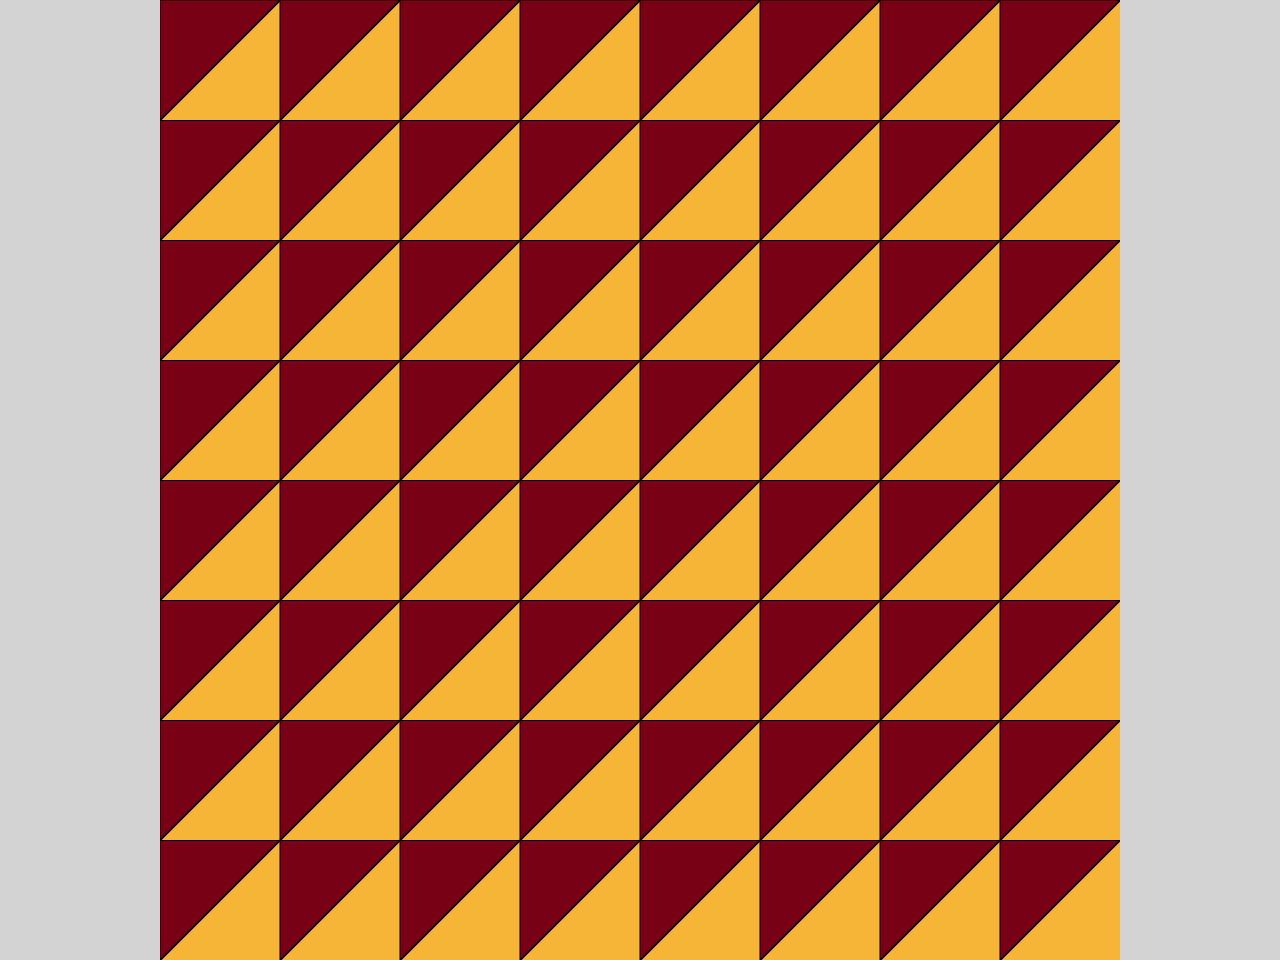

In [46]:
import numpy as np
import pandas as pd
from plotnine import *

def create_truchet_grid(grid_size=8):
    """Create 8x8 grid of squares, each divided diagonally into black and white triangles"""
    data = []
    
    # Set seed for reproducible random pattern
    np.random.seed(42)
    
    for i in range(grid_size):
        for j in range(grid_size):
            # Same pattern for every square - diagonal from top-left to bottom-right (\)
            # Dark red triangle (upper part)
            data.append({
                'x': [i, i+1, i], 
                'y': [j+1, j+1, j],
                'color': 'dark_red', 
                'group': f"{i}_{j}_dark_red"
            })
            # Golden yellow triangle (lower part)
            data.append({
                'x': [i, i+1, i+1], 
                'y': [j, j, j+1],
                'color': 'golden_yellow', 
                'group': f"{i}_{j}_golden_yellow"
            })
    
    return data

def convert_to_dataframe(tile_data):
    """Convert tile data to dataframe for plotnine"""
    rows = []
    for tile in tile_data:
        for idx, (x, y) in enumerate(zip(tile['x'], tile['y'])):
            rows.append({
                'x': x,
                'y': y,
                'color': tile['color'],
                'group': tile['group']
            })
    return pd.DataFrame(rows)

# Create 8x8 Truchet tile grid
tile_data = create_truchet_grid(8)
df = convert_to_dataframe(tile_data)

# Create the plot
plot = (ggplot(df, aes(x='x', y='y', group='group', fill='color')) +
        geom_polygon(color='black', size=0.2) +
        scale_fill_manual(values={'dark_red': '#780116', 'golden_yellow': '#f7b538'}) +
        coord_equal() +
        theme_void() +
        theme(
            legend_position='none',
            plot_background=element_rect(fill='lightgray'),
            panel_background=element_rect(fill='white')
        ) +
        scale_x_continuous(expand=(0, 0), limits=(0, 8)) +
        scale_y_continuous(expand=(0, 0), limits=(0, 8)))

plot

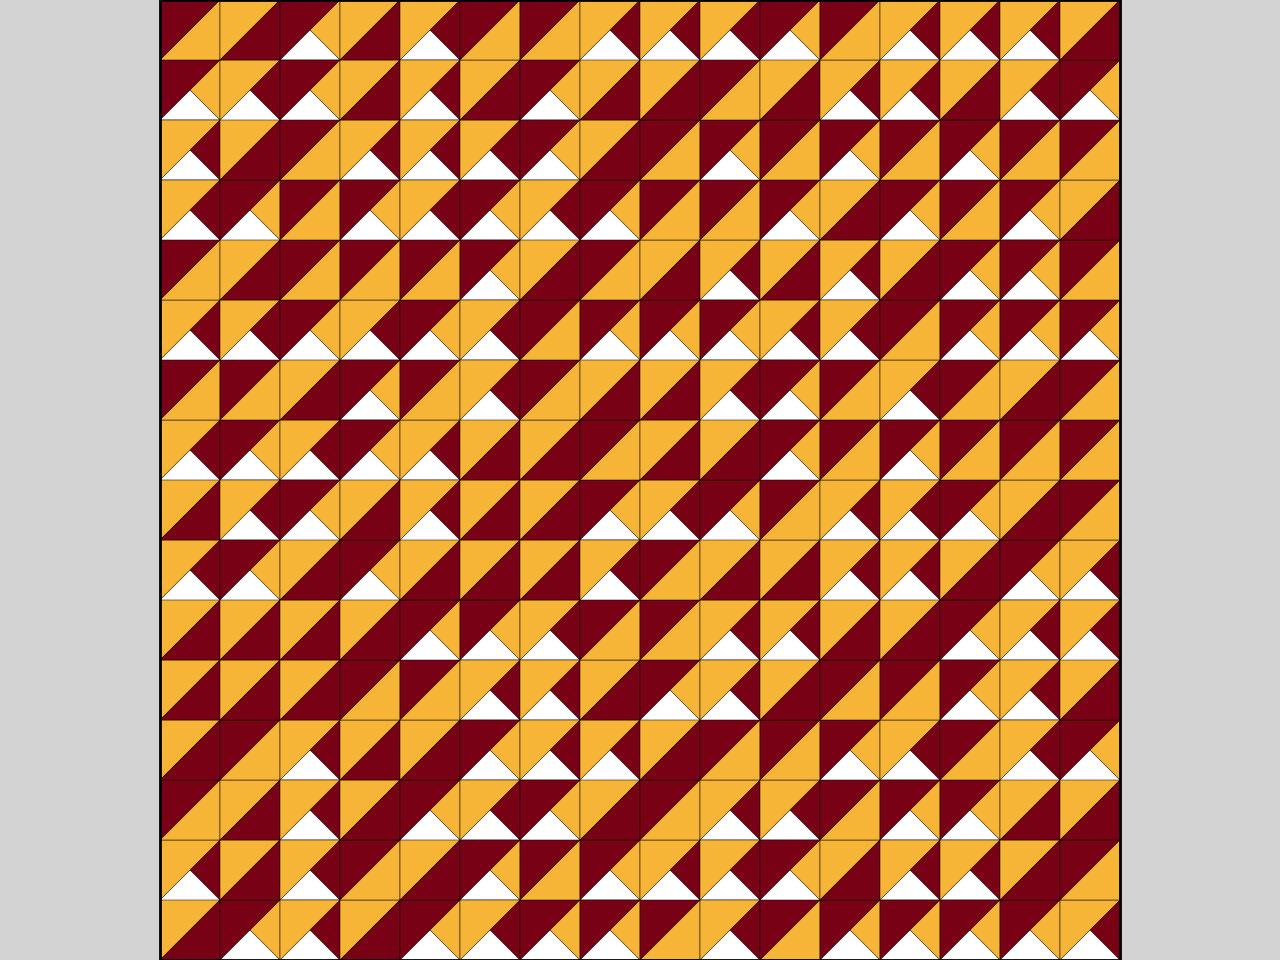

In [52]:
import numpy as np
import pandas as pd
from plotnine import *

def create_randomized_truchet_grid(grid_size=16):
    """Create randomized Truchet tiles with different diagonal orientations"""
    data = []
    
    # Use multiple random seeds for better randomization
    np.random.seed(None)  # Use system time for true randomness
    
    for i in range(grid_size):
        for j in range(grid_size):
            # Randomly choose diagonal direction with fresh randomization each time
            diagonal_direction = np.random.randint(0, 2)
            
            # Add some additional randomness by occasionally flipping the color assignment
            color_flip = np.random.random() > 0.5
            
            if diagonal_direction == 0:
                # Diagonal from top-left to bottom-right (\)
                if color_flip:
                    # Sometimes flip which triangle gets which color
                    color1, color2 = 'golden_yellow', 'dark_red'
                else:
                    color1, color2 = 'dark_red', 'golden_yellow'
                
                # Upper-left triangle
                data.append({
                    'x': [i, i+1, i], 
                    'y': [j+1, j+1, j],
                    'color': color1, 
                    'group': f"{i}_{j}_1"
                })
                # Lower-right triangle
                data.append({
                    'x': [i, i+1, i+1], 
                    'y': [j, j, j+1],
                    'color': color2, 
                    'group': f"{i}_{j}_2"
                })
            else:
                # Diagonal from top-right to bottom-left (/)
                if color_flip:
                    color1, color2 = 'golden_yellow', 'dark_red'
                else:
                    color1, color2 = 'dark_red', 'golden_yellow'
                
                # Upper-right triangle
                data.append({
                    'x': [i, i+1, i+1], 
                    'y': [j+1, j+1, j],
                    'color': color1, 
                    'group': f"{i}_{j}_1"
                })
                # Lower-left triangle
                data.append({
                    'x': [i, i, i+1], 
                    'y': [j, j+1, j+1],
                    'color': color2, 
                    'group': f"{i}_{j}_2"
                })
    
    return data

def convert_to_dataframe(tile_data):
    """Convert tile data to dataframe for plotnine"""
    rows = []
    for tile in tile_data:
        for idx, (x, y) in enumerate(zip(tile['x'], tile['y'])):
            rows.append({
                'x': x,
                'y': y,
                'color': tile['color'],
                'group': tile['group']
            })
    return pd.DataFrame(rows)

# Create 16x16 randomized Truchet tile grid
tile_data = create_randomized_truchet_grid(16)
df = convert_to_dataframe(tile_data)

# Create the plot
plot = (ggplot(df, aes(x='x', y='y', group='group', fill='color')) +
        geom_polygon(color='black', size=0.1) +
        scale_fill_manual(values={'dark_red': '#780116', 'golden_yellow': '#f7b538'}) +
        coord_equal() +
        theme_void() +
        theme(
            legend_position='none',
            plot_background=element_rect(fill='lightgray'),
            panel_background=element_rect(fill='white'),
            panel_border=element_rect(color='black', fill=None, size=1)
        ) +
        scale_x_continuous(expand=(0, 0), limits=(0, 16)) +
        scale_y_continuous(expand=(0, 0), limits=(0, 16)))

plot

# You can also create different grid sizes by changing the parameter:
# For a larger 20x20 grid:
# tile_data_large = create_randomized_truchet_grid(20)
# df_large = convert_to_dataframe(tile_data_large)

# For different random patterns each time, remove or change these lines:
# np.random.seed(123)  # Use different seeds for different patterns
# Or use np.random.seed(None) for completely random patterns each time

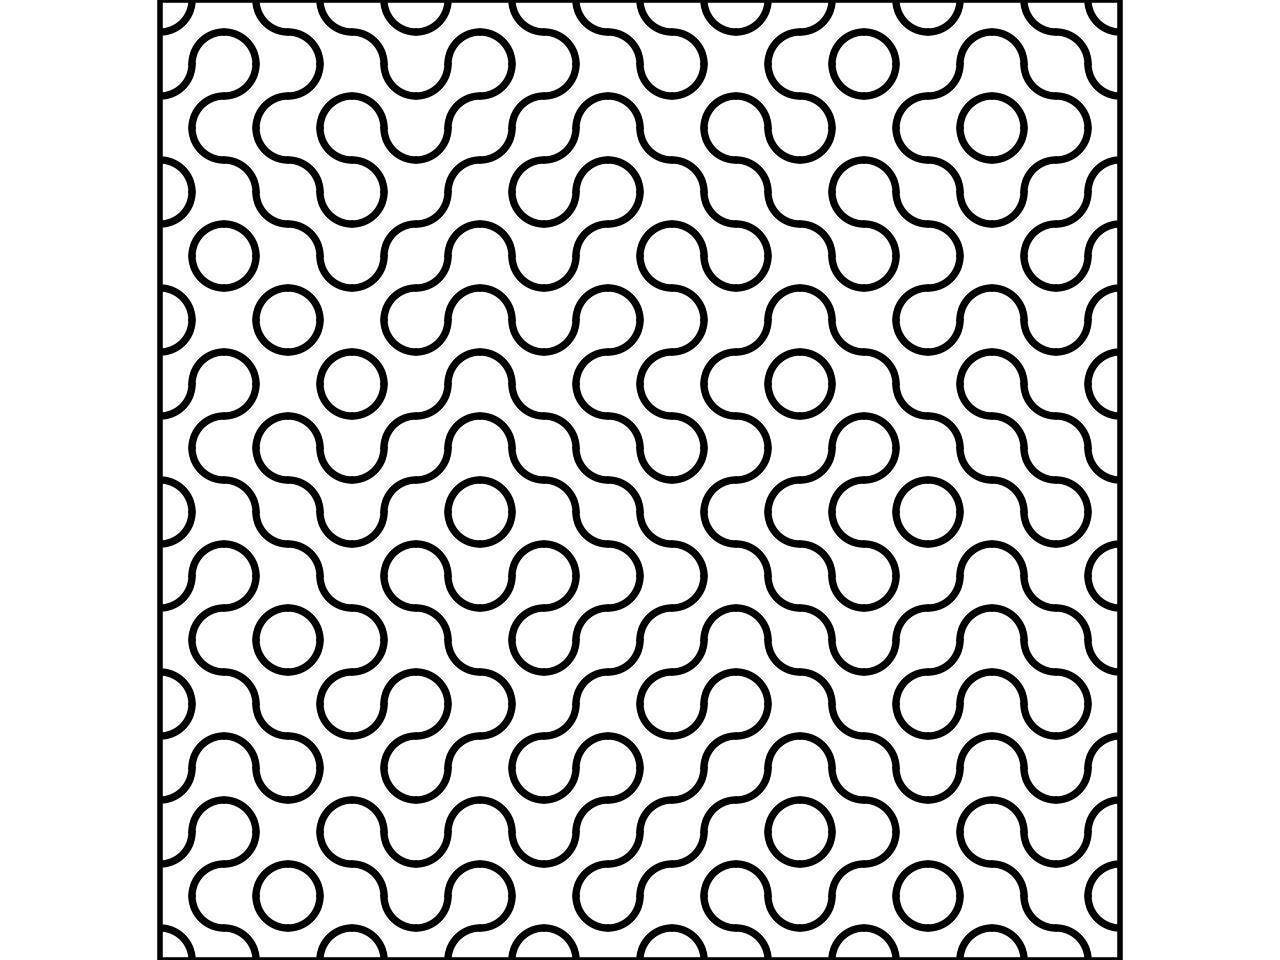

In [57]:
import numpy as np
import pandas as pd
from plotnine import *

def create_flowing_truchet_tiles(grid_size=12):
    """Create curved Truchet tiles that form continuous flowing patterns"""
    data = []
    
    # Set seed for reproducible but organic-looking pattern
    np.random.seed(567)
    
    for i in range(grid_size):
        for j in range(grid_size):
            # Random choice for tile type
            tile_type = np.random.choice([0, 1])
            
            # Number of points for smooth curves
            n_points = 40
            
            # Each tile connects midpoints of opposite edges with smooth curves
            if tile_type == 0:
                # Type 0: Connect left-top and bottom-right with smooth S-curves
                
                # Curve 1: from left edge (i, j+0.5) to top edge (i+0.5, j+1)
                t1 = np.linspace(0, 1, n_points)
                # Smooth cubic bezier-like curve
                x1 = i + t1 * 0.5
                y1 = j + 0.5 + 0.5 * np.sin(t1 * np.pi)
                
                # Curve 2: from bottom edge (i+0.5, j) to right edge (i+1, j+0.5)  
                t2 = np.linspace(0, 1, n_points)
                x2 = i + 0.5 + t2 * 0.5
                y2 = j + 0.5 * np.sin(t2 * np.pi)
                
            else:
                # Type 1: Connect top-right and left-bottom with smooth curves
                
                # Curve 1: from top edge (i+0.5, j+1) to right edge (i+1, j+0.5)
                t1 = np.linspace(0, 1, n_points)
                x1 = i + 0.5 + 0.5 * np.sin(t1 * np.pi)
                y1 = j + 1 - t1 * 0.5
                
                # Curve 2: from left edge (i, j+0.5) to bottom edge (i+0.5, j)
                t2 = np.linspace(0, 1, n_points)  
                x2 = i + 0.5 * np.sin(t2 * np.pi)
                y2 = j + 0.5 - t2 * 0.5
            
            # Add curves to data
            for k in range(len(x1)):
                data.append({
                    'x': x1[k],
                    'y': y1[k],
                    'group': f"{i}_{j}_curve1"
                })
            
            for k in range(len(x2)):
                data.append({
                    'x': x2[k],
                    'y': y2[k],
                    'group': f"{i}_{j}_curve2"
                })
    
    return pd.DataFrame(data)

def create_better_truchet_tiles(grid_size=12):
    """Create proper curved Truchet tiles using quarter circles at corners"""
    data = []
    
    # More random seed for organic pattern
    np.random.seed(789)
    
    for i in range(grid_size):
        for j in range(grid_size):
            # Random orientation
            orientation = np.random.choice([0, 1])
            
            # Create quarter-circle arcs that connect edge midpoints
            n_points = 30
            
            if orientation == 0:
                # Arc from left to top (quarter circle centered at top-left corner)
                angles1 = np.linspace(-np.pi/2, 0, n_points)
                cx1, cy1 = i, j + 1  # center at top-left corner
                radius = 0.5
                x1 = cx1 + radius * np.cos(angles1)
                y1 = cy1 + radius * np.sin(angles1)
                
                # Arc from bottom to right (quarter circle centered at bottom-right corner)  
                angles2 = np.linspace(np.pi/2, np.pi, n_points)
                cx2, cy2 = i + 1, j  # center at bottom-right corner
                x2 = cx2 + radius * np.cos(angles2)
                y2 = cy2 + radius * np.sin(angles2)
                
            else:
                # Arc from top to right (quarter circle centered at top-right corner)
                angles1 = np.linspace(np.pi, 3*np.pi/2, n_points)
                cx1, cy1 = i + 1, j + 1  # center at top-right corner
                radius = 0.5
                x1 = cx1 + radius * np.cos(angles1)
                y1 = cy1 + radius * np.sin(angles1)
                
                # Arc from left to bottom (quarter circle centered at bottom-left corner)
                angles2 = np.linspace(0, np.pi/2, n_points)
                cx2, cy2 = i, j  # center at bottom-left corner  
                x2 = cx2 + radius * np.cos(angles2)
                y2 = cy2 + radius * np.sin(angles2)
            
            # Add arcs
            for k in range(len(x1)):
                data.append({
                    'x': x1[k],
                    'y': y1[k],
                    'group': f"{i}_{j}_arc1"
                })
                
            for k in range(len(x2)):
                data.append({
                    'x': x2[k],
                    'y': y2[k],
                    'group': f"{i}_{j}_arc2"
                })
    
    return pd.DataFrame(data)

# Create the better curved Truchet pattern
grid_size = 15
df_curves = create_better_truchet_tiles(grid_size)

# Create the plot without grid lines for cleaner look
plot = (ggplot(df_curves, aes(x='x', y='y', group='group')) +
        geom_path(color='black', size=1.5, lineend='round') +
        coord_equal() +
        theme_void() +
        theme(
            plot_background=element_rect(fill='white'),
            panel_background=element_rect(fill='white'),
            panel_border=element_rect(color='black', fill=None, size=2)
        ) +
        scale_x_continuous(expand=(0, 0), limits=(0, grid_size)) +
        scale_y_continuous(expand=(0, 0), limits=(0, grid_size)))

plot

#FE0300, #FFF101, #0101FC, #DDDCDD